# Desafio

Um dos maiores desafios na parte de visualização é conseguir fazer o gráfico que queremos!  
  
A melhor skill que podemos ter ao trabalhar com isso é saber procurar, ler a documentação, stackoverflow, etc...  
  
Dado isso, te desafio a conseguir replicar o gráfico que deixo na última célula de markdown desse notebook.  
__Lembrando que pode ser difícil, e que no final da aula veremos a resolução :)__

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# seta o visual para ficar no padrão
sns.set()

Base de dados:  

In [3]:
# lemos o conjunto de dados utilizando o load_dataset do próprio seaborn, feito para exemplos
df_voos = sns.load_dataset('flights')
df_voos.rename(columns={
    'year': 'ano',
    'month': 'mes',
    'passengers': 'passageiros'
}, inplace=True)
df_voos.head()

,ano,mes,passageiros
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


Agrupamento para ter a proporção de passageiros para cada mês em relação ao ano:

In [4]:
# faço dois groupby, um pelo ano e mes, e o outro pelo ano, para conseguir a proporção!
# se não estiver confortável com o groupby ainda, olhe-os separadamente que fica mais fácil de entender.
df_voos_agrupado = (df_voos.groupby(by=['ano', 'mes']).sum()/df_voos.groupby(by=['ano']).sum()).reset_index()
df_voos_agrupado.head()

,ano,mes,passageiros
0,1949,Jan,0.073684
1,1949,Feb,0.077632
2,1949,Mar,0.086842
3,1949,Apr,0.084868
4,1949,May,0.079605


Para o gráfico não ficar poluído, vamos utilizar só 3 meses. Eu utilizei ```meses_filtro = ['Jan', 'Feb', 'Mar']```, mas pode escolher quaisquer 3 meses!

In [5]:
# filtrando os meses! Eu sempre uso o .copy() para não fazer mudanças na referência do DataFrame sem querer
meses_filtro = ['Jan', 'Feb', 'Mar']
df_voos_filtrado = df_voos_agrupado[df_voos_agrupado['mes'].isin(meses_filtro)].copy()

# como o mês é uma variável categórica, ele carrega consigo as categorias, então, eu tiro as não-usadas
df_voos_filtrado['mes'] = df_voos_filtrado['mes'].cat.remove_unused_categories()

# ficamos com:
df_voos_filtrado['mes'].unique()

['Jan', 'Feb', 'Mar']
Categories (3, object): ['Jan', 'Feb', 'Mar']

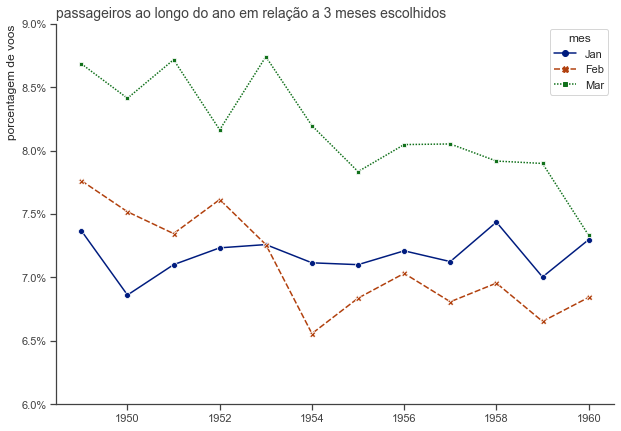

In [7]:
sns.set_style('ticks');
sns.set_palette('dark');
plt.figure(figsize=(10,7))


ax = sns.lineplot(data=df_voos_filtrado, x='ano', y='passageiros', hue='mes', style='mes', markers=True);

ax.set_xlabel('');
ax.set_ylabel('porcentagem de voos', loc='top');

ax.set_yticks(ax.get_yticks());
ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()]);

cor_hexa='#424242'

ax.set_title('passageiros ao longo do ano em relação a 3 meses escolhidos', loc='left', fontsize=14, color=cor_hexa);
ax.tick_params(color=cor_hexa, labelcolor=cor_hexa)
for spine in ax.spines.values():
    spine.set_edgecolor(cor_hexa)
sns.despine(left=False, bottom=False);